| ![EEW logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/main/Jupyter%20instructions/eew.jpg?raw=true) | ![EDGI logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/main/Jupyter%20instructions/edgi.png?raw=true) |
|---|---|


#### This notebook is licensed under GPL 3.0.
#### The notebook was collaboratively authored by the Environmental Data & Governance Initiative (EDGI) following [our authorship protocol](https://docs.google.com/document/d/1CtDN5ZZ4Zv70fHiBTmWkDJ9mswEipX6eCYrwicP66Xw/)
#### For more information about this project, visit [our website](https://www.environmentalenforcementwatch.org/)

## How to Run
![Instructions for running a Jupyter Notebook](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/main/overall_instructions.png?raw=true)

## Get ready

In [1]:
!pip install ECHO_modules &>/dev/null; # EDGI's existing code for accessing EPA data
from IPython.core.display import HTML # For pretty output
import warnings
warnings.filterwarnings("ignore") # Ignore warnings we already know about...

## Load data
We are loading statistics for the five year period 2019-2023 on enforcement of and compliance with environmental protection laws - the Clean Air, Clean Water, and Resource Conservation and Recovery Acts. These statistics were previously compiled from separate analyses.

In [115]:
import pandas
trends = pandas.read_csv("https://github.com/edgi-govdata-archiving/ECHO-National/raw/main/nationwide_trends.csv")
trends["ghg_max"] = trends["ghg_max"].astype('float64')
trends

,year,caa_inspections per 1000 facilities,caa_violations per 1000 facilities,caa_formal enforcement actions per violation,caa_penalty per facility in violation,caa_penalty max,caa_penalty min,cwa_inspections per 1000 facilities,cwa_violations per 1000 facilities,cwa_formal enforcement actions per violation,...,cwa_penalty min,rcra_inspections per 1000 facilities,rcra_violations per 1000 facilities,rcra_formal enforcement actions per violation,rcra_penalty per facility in violation,rcra_penalty max,rcra_penalty min,ghg_emissions per reporting facility,ghg_max,ghg_min
0,2019,261.62,21.64,0.65,22985.04,3709513,100,148.03,1107.71,0.01,...,57.36,37.30,24.12,0.48,3165.75,2295000,250.00,422134.34,18429639.23,0.6
1,2020,244.19,17.29,0.67,61543.96,10000000,100,129.65,1077.96,0.01,...,43.95,29.91,14.05,0.52,25628.19,38000000,33.88,403679.07,19169743.38,0.1
2,2021,246.09,18.82,0.66,29594.80,3300000,100,129.49,1152.28,0.01,...,75.00,29.13,15.04,0.52,168143.47,3800000,0.01,365835.37,17232897.61,0.1
3,2022,241.16,22.66,0.67,87011.52,10455925,50,124.65,1026.33,0.01,...,86.57,39.30,29.28,0.40,2480.19,2844694,0.01,384211.53,20998638.90,0.2
4,2023,194.20,17.41,0.60,136009.23,40336818,100,95.27,856.61,0.01,...,138.85,25.40,15.81,0.48,2906.24,689900,211.00,382474.04,21775439.59,0.1


## Select a Program to Analyze
Select from the Clean Air, Clean Water, and Resource Conservation and Recovery Acts or Greenhouse Gas Reporting Program. Then select whether you want to focus on inspections, violations, enforcement actions, penalties, or, in the case of the Greenhouse Gas Reporting Program, emissions. Proceed to run the next cell in order to view the results.

In [47]:
import ipywidgets as widgets

program_key = {"Clean Air Act": "caa", "Clean Water Act": "cwa", "Resource Conservation and Recovery Act": "rcra", "Greenhouse Gas Reporting Program": "ghg"}
indicator_key = {"Inspections Per 1000 Facilities": "inspections per 1000 facilities", "Violations Per 1000 Facilities": "violations per 1000 facilities",
                 "Formal Enforcement Actions Per Violation": "formal enforcement actions per violation", "Penalties Per Facility in Violation": "penalty per facility in violation",
                 "Max Penalty": "penalty max", "Minimum Penalty": "penalty min", "Emissions": "emissions per reporting facility",
                 "Max Emissions": "max", "Minimum Emissions": "min"}

program = widgets.Dropdown(
    options=list(program_key.keys()),
    description='Program:',
    disabled=False,
)
indicator = widgets.SelectMultiple(
    options=list(indicator_key.keys()),
    description='Indicator:',
    layout = widgets.Layout(width='500px'),
    disabled=False,
)
display(program)
display(indicator)

Dropdown(description='Program:', options=('Clean Air Act', 'Clean Water Act', 'Resource Conservation and Recov…

SelectMultiple(description='Indicator:', layout=Layout(width='500px'), options=('Inspections Per 1000 Faciliti…

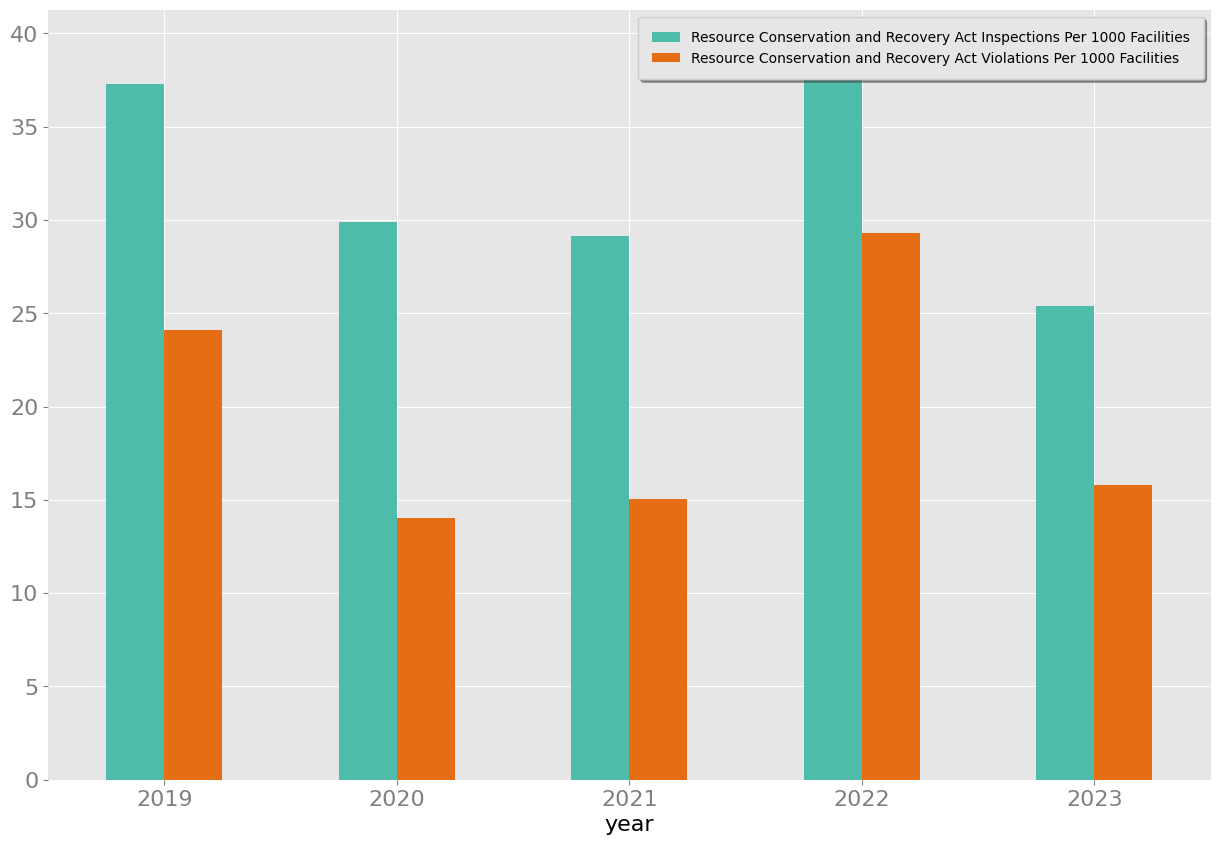

In [114]:
import ECHO_modules.utilities # import chart style
import matplotlib

try:
  indicators = ["year"]
  for i in list(indicator.value):
    indicators.append(program_key[program.value]+"_"+indicator_key[i])

  to_chart = trends[indicators]

  cols = {x: program.value + " " + list(indicator_key.keys())[list(indicator_key.values()).index(x.split("_")[1])]
          for i,x in enumerate(indicators) if x != "year"}

  to_chart.rename(columns=cols, inplace=True)

  chart = to_chart.plot(x="year", y=list(to_chart.columns).remove("year"), kind="bar",
                rot = 0, figsize=(15, 10)).legend(fontsize=10, loc="upper right")

except KeyError:
  print("Please try again. Remember, only the Greenhouse Gas Reporting Program has information about emissions.")
except TypeError:
  print("Please select an indicator to plot.")